In [1]:
import glob
import os
import json
import pickle
import yaml

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import pyarrow.parquet as pq
from sklearn.metrics import auc, roc_curve
from scipy.special import softmax

import hist as hist2
import matplotlib.pyplot as plt
import mplhep as hep

plt.style.use(hep.style.CMS)

import matplotlib.pyplot as plt
import mplhep as hep
from hist.intervals import clopper_pearson_interval
def get_yerr(num,den):
    return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())

import utils_farouk as utils
plt.rcParams.update({"font.size": 20})

/opt/anaconda3/envs/coffea-env/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pickle as pkl
with open ("../trigger_output/ggF/0-100.pkl", "rb") as f:
    f = pkl.load(f)

In [4]:
channels = ["ele", "mu"]

ggF = "GluGluHToWW_Pt-200ToInf_M-125"

out = {}
for ch in channels:
    out[ch] = f["2017"][ggF]["skimmed_events"][ch]

nevents = f["2017"][ggF]["nevents"]
nevents

496999

In [5]:
out[ch].keys()

dict_keys(['triggers', 'vars', 'weights'])

In [6]:
out[ch]["triggers"].keys()

dict_keys(['HLT_Mu50', 'HLT_IsoMu27', 'HLT_OldMu100', 'HLT_TkMu100'])

In [7]:
out[ch]["vars"].keys()

dict_keys(['fj_pt', 'fj_msoftdrop', 'lep_pt', 'fj_genH_pt'])

In [8]:
out[ch]["weights"].keys()

dict_keys(['weight_genweight', 'weight_L1Prefiring', 'weight_pileup', 'weight_id_electron', 'weight_reco_electron', 'weight_trigger_electron', 'weight_trigger_iso_muon', 'weight_trigger_noniso_muon', 'weight_isolation_muon', 'weight_id_muon'])

# Make plots

In [9]:
colors_dict = {
    "combined triggers": "red",
    "HLT_ele35": "blue",
    "HLT_ele115": "green",
    "HLT_Photon200": "orange",
    
    "HLT_Mu50": "blue",
    "HLT_IsoMu27": "green",
    "HLT_OldMu100": "orange",    
    "HLT_TkMu100": "brown"
}

nice_channel = {
    "ele": "Electron",
    "mu": "Muon",
}

In [16]:
channels = ["ele", "mu"]

# now we can make histograms for higgspt, jetpt, leptonpt
import hist as hist2
trigger_axis = hist2.axis.StrCategory([], name='trigger', growth=True)
hpt_axis = hist2.axis.Regular(25, 100, 700, name='higgspt', label=r'matched H $p_T$ [GeV]')
leppt_axis = hist2.axis.Regular(25, 10, 400, name='leppt', label=r'Lepton $p_T$ [GeV]')

hists = {}
for ch in channels:

    # define hists
    hists[ch] = hist2.Hist(
                    trigger_axis,
                    hpt_axis,
                    leppt_axis,
                )

    triggers_ = out[ch]["triggers"]
    vars_ = out[ch]["vars"]
    weights_ = out[ch]["weights"]

    # save events after each trigger    
    for trigger in triggers_:
        hists[ch].fill(
            trigger=trigger,
            higgspt=vars_["fj_genH_pt"][triggers_[trigger]],
            leppt=vars_["lep_pt"][triggers_[trigger]],
        )        

    # save events before trigger        
    hists[ch].fill(
        trigger="all_events",
        higgspt=vars_["fj_genH_pt"],
        leppt=vars_["lep_pt"],
    )
    
    # save an xor of triggers
    for i, trigger in enumerate(triggers_):    
        if i==0:
            or_of_triggers = triggers_[trigger] 
        else:
            or_of_triggers = or_of_triggers | triggers_[trigger] 
    
    hists[ch].fill(
        trigger="or_of_triggers",
        higgspt=vars_["fj_genH_pt"][or_of_triggers],
        leppt=vars_["lep_pt"][or_of_triggers],
    )    

hists

{'ele': Hist(
   StrCategory(['HLT_ele35', 'HLT_ele115', 'HLT_Photon200', 'all_events', 'or_of_triggers'], growth=True, name='trigger'),
   Regular(25, 100, 700, name='higgspt', label='matched H $p_T$ [GeV]'),
   Regular(25, 10, 400, name='leppt', label='Lepton $p_T$ [GeV]'),
   storage=Double()) # Sum: 92075.0 (113461.0 with flow),
 'mu': Hist(
   StrCategory(['HLT_Mu50', 'HLT_IsoMu27', 'HLT_OldMu100', 'HLT_TkMu100', 'all_events', 'or_of_triggers'], growth=True, name='trigger'),
   Regular(25, 100, 700, name='higgspt', label='matched H $p_T$ [GeV]'),
   Regular(25, 10, 400, name='leppt', label='Lepton $p_T$ [GeV]'),
   storage=Double()) # Sum: 197238.0 (242702.0 with flow)}

<ipython-input-1-166c3e4538f5>:24: RuntimeWarning: invalid value encountered in divide
  return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())
<ipython-input-1-166c3e4538f5>:24: RuntimeWarning: invalid value encountered in divide
  return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())
<ipython-input-1-166c3e4538f5>:24: RuntimeWarning: invalid value encountered in divide
  return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())
<ipython-input-1-166c3e4538f5>:24: RuntimeWarning: invalid value encountered in divide
  return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())
<ipython-input-1-166c3e4538f5>:24: RuntimeWarning: invalid value encountered in divide
  return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())
<ipython-input-1-166c3e4538f5>:24: RuntimeWarning: invalid value encountered in divide
  return abs(clopper_pearson_interval(num.v

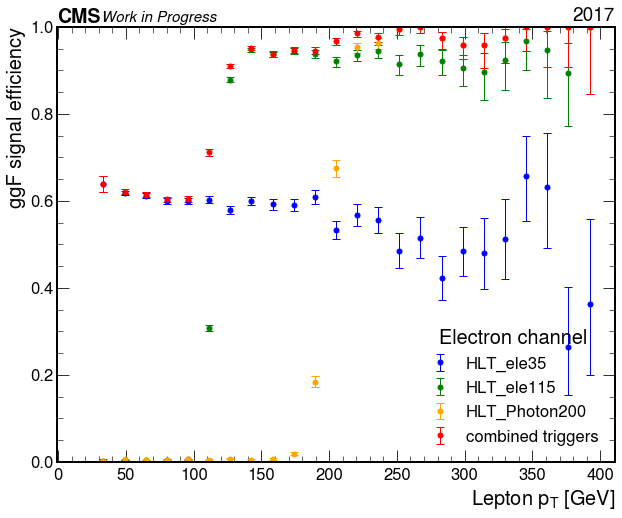

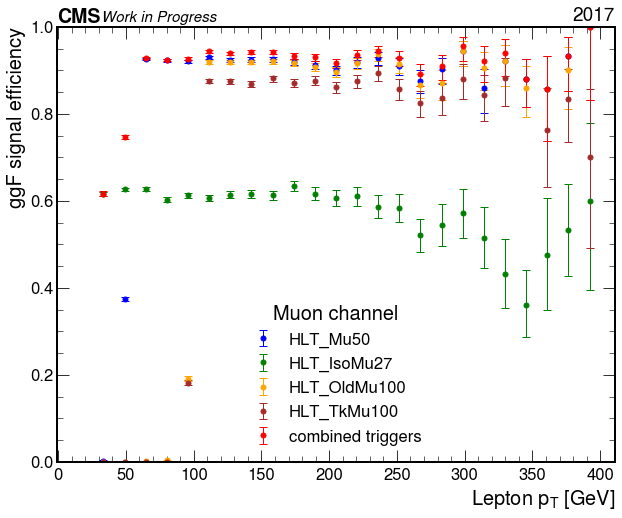

In [17]:
plt.rcParams.update({"font.size": 20})

# now we plot trigger efficiency as function of jetpt
for ch in channels:
    triggers_ = out[ch]["triggers"]
   
    fig, ax = plt.subplots(figsize=(10,8))

    den = hists[ch][{"trigger": "all_events", 'higgspt':sum}]
    
    for trigger in triggers_:

        hep.histplot(hists[ch][{"trigger":trigger, 'higgspt':sum}]/den,
                     ax = ax,
                     label=trigger,
                     color=colors_dict[trigger],
                     histtype='errorbar', 
                     yerr=get_yerr(hists[ch][{"trigger":trigger, 'higgspt':sum}], den),
                     capsize=4, 
                     elinewidth=1,              
        )
        
    hep.histplot(hists[ch][{"trigger":"or_of_triggers", 'higgspt':sum}]/den,
                 ax = ax,
                 label="combined triggers",
                 color=colors_dict["combined triggers"],                 
                 histtype='errorbar', 
                 yerr=get_yerr(hists[ch][{"trigger":"or_of_triggers", 'higgspt':sum}], den),
                 capsize=4, 
                 elinewidth=1,              
    )
    
    ax.set_ylim(0,1)
    ax.legend(title=f"{nice_channel[ch]} channel")
    ax.set_ylabel("ggF signal efficiency")
    hep.cms.lumitext(
        "2017", ax=ax, fontsize=20
    )
    hep.cms.text("Work in Progress", ax=ax, fontsize=15)
    plt.savefig(f'/Users/fmokhtar/Desktop/trigger_{ch}.pdf');